In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
from tqdm import tqdm
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import cv2
from keras import backend as k
import tensorflow as tf
import random


In [ ]:
import sys
  
# adding Folder_2 to the system path
sys.path.insert(0, '../src/modelling/')
  
# importing the add and odd_even 
# function
from model.py import history

In [2]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [21]:
model1 = load_model("../models/model1/model1.h5")

In [4]:
def classify_driver(img_path, model):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    return prediction, img
#     print(decode_predictions(prediction, top=3)[0])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.9746413e-20 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


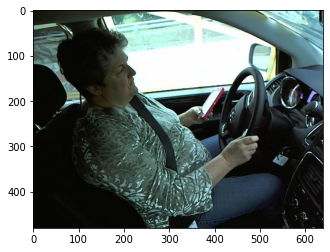

In [22]:
test_img_path = "../data/raw_data/imgs/test/img_7.jpg"
prediction, img = classify_driver(test_img_path, model1)
print(prediction)
img = plt.imread(test_img_path)
plt.imshow(img)

In [24]:
def make_pred(model):
    predictions = []
    test_imgs = []
    for filepath in tqdm(glob.iglob('../data/raw_data/imgs/small_test/*.jpg')):
        row, img = classify_driver(filepath, model)
        test_imgs.append(img)
        file_name = filepath.split("\\")[-1]
        row = list(row[0])
        row.insert(0, file_name)
        predictions.append(row)
    return predictions, test_imgs

In [25]:
predictions1, test_imgs = make_pred(model1)
pred_df1 = pd.DataFrame (predictions1, columns = ['img', 'c0', 'c1', 'c2','c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])

113it [00:06, 18.08it/s]


In [8]:
'''
The 10 classes to predict are:

c0: normal driving
c1: texting - right
c2: talking on the phone - right
c3: texting - left
c4: talking on the phone - left
c5: operating the radio
c6: drinking
c7: reaching behind
c8: hair and makeup
c9: talking to passenger
'''

'\nThe 10 classes to predict are:\n\nc0: normal driving\nc1: texting - right\nc2: talking on the phone - right\nc3: texting - left\nc4: talking on the phone - left\nc5: operating the radio\nc6: drinking\nc7: reaching behind\nc8: hair and makeup\nc9: talking to passenger\n'

In [9]:
pred_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   img     113 non-null    object 
 1   c0      113 non-null    float32
 2   c1      113 non-null    float32
 3   c2      113 non-null    float32
 4   c3      113 non-null    float32
 5   c4      113 non-null    float32
 6   c5      113 non-null    float32
 7   c6      113 non-null    float32
 8   c7      113 non-null    float32
 9   c8      113 non-null    float32
 10  c9      113 non-null    float32
dtypes: float32(10), object(1)
memory usage: 5.4+ KB


In [10]:
predictions1[1]

['img_10.jpg', 1.1077966e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]

In [8]:
class_desc = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }

In [54]:
# # labels is the image array
# fig, ax = plt.subplots(20,1, figsize = (100,100))

# for i in range(20):
#     ax[i].imshow(test_imgs[i])
#     predicted_class = 'C'+str(np.where(predictions1[i][1:] == np.amax(predictions1[i][1:]))[0][0])
#     ax[i].set_title(class_desc[predicted_class])
#     plt.show

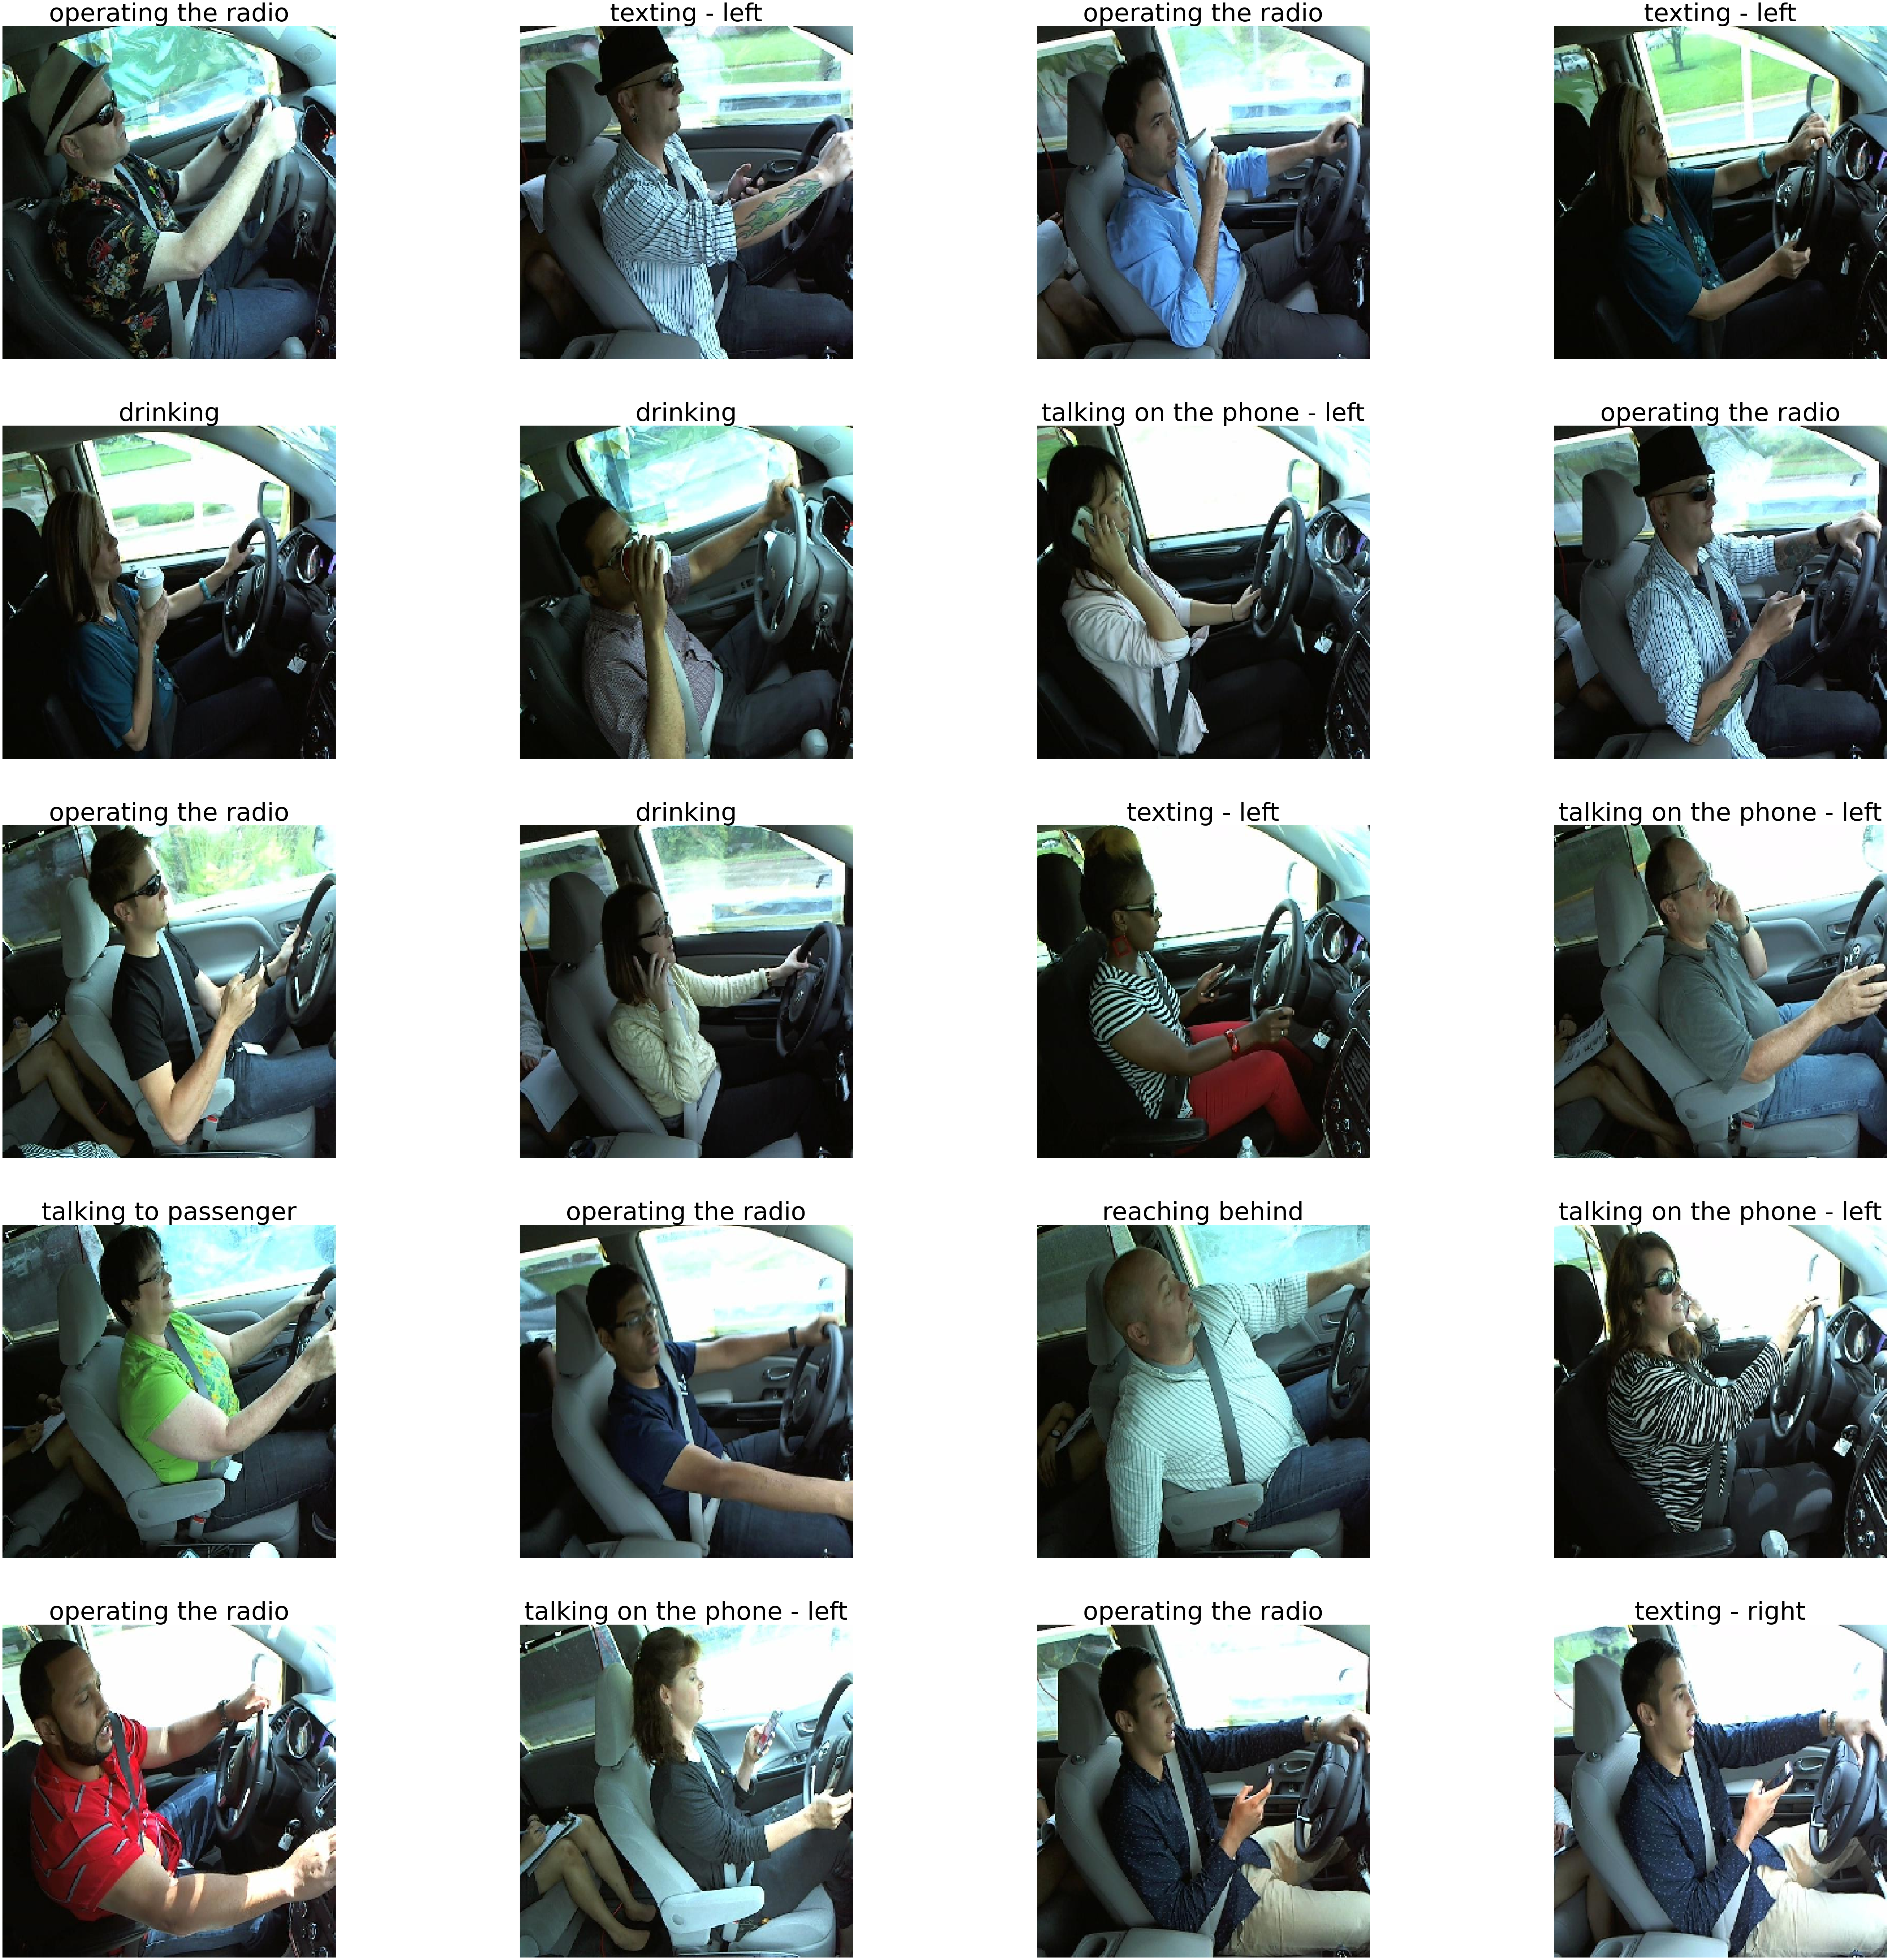

In [53]:
fig, ax = plt.subplots(5,4, figsize = (100,100))
ax = ax.flatten()
for img, ax in zip(random.sample(test_imgs, 20), ax):
    i = test_imgs.index(img)
    predicted_class = 'C'+str(np.where(predictions1[i][1:] == np.amax(predictions1[i][1:]))[0][0])
    ax.set_title(class_desc[predicted_class], size=70)
    ax.imshow(img)
    ax.axis("off")

KeyError: 'accuracy'

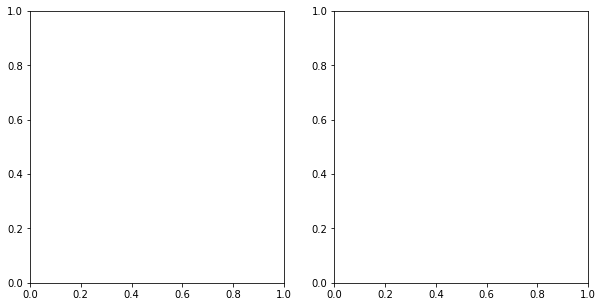

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('CNN Dropout Accuracy Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(history.history['loss']) + 1), history.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Dropout Loss Trainig VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

In [17]:
model1.metrics_names

['loss', 'accuracy']

In [13]:
outputTensor = model1.output #Or model.layers[index].output
listOfVariableTensors = model1.trainable_weights
gradients = tf.GradientTape(outputTensor, listOfVariableTensors)

In [16]:
print(gradients)